In [11]:
from torchvision.datasets import CIFAR10
import torchvision.transforms as transforms
import torchvision.transforms.functional as F
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import numpy as np


train_set = CIFAR10(root="./data", train=True, transform=None, download=True)
val_set = CIFAR10(root="./data", train=False, transform=None, download=True)


print("This dataset has {0} training images".format(len(train_set)))


Files already downloaded and verified
Files already downloaded and verified
This dataset has 50000 training images


Image size is 3x32x32
Image 0 is a frog


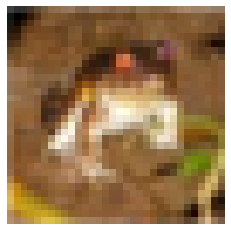

In [22]:
img_index = 0
img, label = train_set[img_index]
img = F.to_tensor(img)
print("Image size is {0}x{1}x{2}".format(img.shape[0], img.shape[1], img.shape[2]))

classes = ["airplane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
print('Image {0} is a {1}'.format(img_index, classes[label]))

plt.figure()
plt.imshow(img.transpose(0, 2).transpose(0, 1))
plt.grid(False)
plt.axis('off')
plt.show()

tensor([[0.0854],
        [0.1571],
        [0.0992],
        [0.0900],
        [0.1003],
        [0.1054],
        [0.1004],
        [0.0979],
        [0.0875],
        [0.0768]])
Train-epoch 0. Iteration 01000, Avg_loss: 2.2668, Accuracy: 0.1620
Train-epoch 0. Iteration 02000, Avg_loss: 2.2006, Accuracy: 0.1930
Train-epoch 0. Iteration 03000, Avg_loss: 2.1642, Accuracy: 0.2057
Train-epoch 0. Iteration 04000, Avg_loss: 2.1376, Accuracy: 0.2182
Train-epoch 0. Iteration 05000, Avg_loss: 2.1165, Accuracy: 0.2292
Train-epoch 0. Iteration 06000, Avg_loss: 2.0994, Accuracy: 0.2393
Train-epoch 0. Iteration 07000, Avg_loss: 2.0838, Accuracy: 0.2447
Train-epoch 0. Iteration 08000, Avg_loss: 2.0700, Accuracy: 0.2500
Train-epoch 0. Iteration 09000, Avg_loss: 2.0588, Accuracy: 0.2551
Train-epoch 0. Iteration 10000, Avg_loss: 2.0487, Accuracy: 0.2604
Train-epoch 0. Iteration 11000, Avg_loss: 2.0421, Accuracy: 0.2644
Train-epoch 0. Iteration 12000, Avg_loss: 2.0342, Accuracy: 0.2679
Train-epoch 0. 

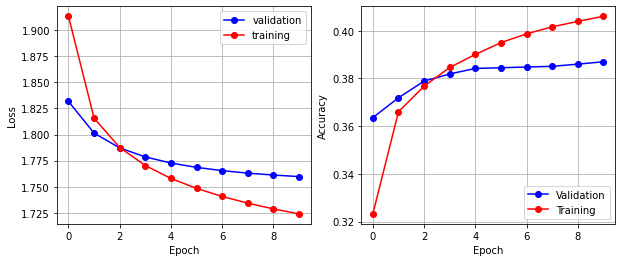

In [29]:

def loss_softmax_backward(label, predictions):
    grad_inputs = predictions.clone()
    grad_inputs[label] = grad_inputs[label] - 1
    return grad_inputs




def linear_backward(x, weight, bias, gradOutput):
    gradBias = bias.clone().zero_()
    gradWeight = weight.clone().zero_()
    gradWeight = gradOutput * x.t()
    gradBias.copy_(gradOutput)

    return gradWeight, gradBias



def loss(label, predictions):
    return -predictions[label].log()


def softmax(a):
    max_vel = a.max()
    exp_a = (a - max_vel).exp()
    return exp_a.div(exp_a.sum())

num_input = 3*32*32
num_output = 10

weight = torch.zeros(10, num_input).normal_(0, 0.01)
bias = torch.zeros(num_output, 1).normal_(0, 0.01)

img = F.to_tensor(img)
img = img.view(3 * 32 * 32, 1)
a = torch.matmul(weight, img) + bias
result = softmax(a)
print(result)


learningRate = 3e-4
N = 10
train_accuracies = []
val_accuracies = []
train_loss = []
val_loss = []



for epoch in range(0, N):
    correct = 0.0
    cum_loss = 0.0
    for (i, (img, label)) in enumerate(train_set):
        x = F.to_tensor(img)
        x = x.view(3 * 32 * 32, 1)

        a = torch.matmul(weight, x) + bias
        predictions = softmax(a)
        cum_loss += loss(label, predictions).item()
        max_score, max_label = predictions.max(0)
        if max_label[0] == label: correct += 1

        gradOutput = loss_softmax_backward(label, predictions)
        gradWeight, gradBias = linear_backward(x, weight, bias, gradOutput)
        weight.add_(-learningRate, gradWeight)
        bias.add_(-learningRate, gradBias)

        if(i + 1) % 1000 == 0:
            print("Train-epoch %d. Iteration %05d, Avg_loss: %.4f, Accuracy: %.4f" %
                  (epoch, i + 1, cum_loss/(i + 1), correct / (i + 1)))

    train_accuracies.append(correct / len(train_set))
    train_loss.append(cum_loss / len(train_set))


    correct = 0
    cum_loss = 0
    for(i, (img, label)) in enumerate(val_set):
        x = F.to_tensor(img)
        x = x.view(3 * 32 * 32, 1)

        a = torch.matmul(weight, x) + bias
        predictions = softmax(a)
        cum_loss += loss(label, predictions).item()
        max_score, max_label = predictions.max(0)
        if max_label[0] == label: correct += 1

    val_accuracies.append(correct / len(val_set))
    val_loss.append(cum_loss / len(val_set))

    print("Validation epoch: %d, Avg_loss: %.4f, Accuracy: %.4f" %
          (epoch, cum_loss/len(val_set), correct/len(val_set)))



plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(val_loss, "bo-", label="val-loss")
plt.plot(train_loss, "ro-", label="train-loss")
plt.grid("on")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["validation", "training"], loc="upper right")

plt.subplot(1, 2, 2)
plt.plot(val_accuracies, "bo-", label="val-acc")
plt.plot(train_accuracies, "ro-", label="train-acc")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.grid("on")
plt.legend(["Validation", "Training"], loc="lower right")
plt.show()